# Module 8 - Final Project

You have made it to the end of the course, and you have worked hard to develop your DSA perspectives and skills.  So far we have been internally focused on the operations of performing data science and analytics.  Now we will extend our work to the development of a data story that is externally focused.

In the Module8 labs, you saw simplified examples of constructing data stories. In module4 (Database) there also was an abbreviated example data story.  Throughout the course, there are components and parts useful to consider as a basis for developing a short, unique, focused data story.


For this final project, you will 

- Step 0: Choose your Language for this Adventure

- Step 1: Find a Story

- Step 2: Remember your Audience

- Step 3: Find and Stage Your Data

- Step 4: Vet Data Sources

- Step 5: Filter Results and Build/Validate Models

- Step 6: Visualize Results

- Step 7: Communicate the Story to your intended audience using visualizations and narratives

- Final Step: Connect your workflow/process to the DSA-Project Life Cycle

---
Here are some recommendations for managing the scope and quality of this project:

- Narrow down the issue, problem, question, or hypothesis for you data story to a single, relatively simple perspective.

- Identify already available data that affords addressing your problem.  If using completely new data, know it well.

- Address the data relative to the statistical/machine learning model(s) chosen to minimize any issues.

- Internally document your code using comments that explain the purpose of the operation(s).


Make your project unique by

- Comparing two or more different statistical/machine learning models using the same data.
- Refrain from identically replicating any existing projects obtained from external sources.
- Running a single model multiple times and changing a different single parameter each time for comparison.
- Changing the sampling proportions for building the hold-out data and comparing the same model performance repeatedly.
- Select something you find interesting or unique in the data and write a story around it.




## Step 0: Choose your Language for this Adventure:

You can do this project in either *R* or *Python*.

To change the kernel of this notebook, do the following with the `Kernel` menu.

 * `Kernel > Change Kernel > Python 3`
 * `Kernel > Change Kernel > R`

![FP_Change_Kernel.png MISSING](../images/FP_Change_Kernel.png)


---
## Step 1: Find a Story

Think back to any of the data files we have used in this class. 
Alternatively, you can search online for potential data and story ideas.

In the cell below, please detail the source of your data (with link).
Additionally, preview the story you hope to uncover.

In [61]:
library(tidyr)
library(tree)
library(caret)
library(dplyr)
#install.packages("rpart.plot")
library(rpart)
library(rpart.plot) 
install.packages("ggdendro")
library(ggdendro)


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [43]:
heart <- read.csv('heart.csv')
#sapply(heart, function(x) sum(is.na(x)))
summary(heart)

rename(heart, ChestPain = cp, restBP = trestbps, fastBS = fbs, maxHR = thalach, exAng= exang, flourVessel = ca, thalassemia = thal, heartDisease = target)


      age             sex               cp            trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.0000   Min.   : 94.0  
 1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:120.0  
 Median :56.00   Median :1.0000   Median :1.0000   Median :130.0  
 Mean   :54.43   Mean   :0.6956   Mean   :0.9424   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.0000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.0000   Max.   :200.0  
      chol          fbs            restecg          thalach     
 Min.   :126   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:132.0  
 Median :240   Median :0.0000   Median :1.0000   Median :152.0  
 Mean   :246   Mean   :0.1493   Mean   :0.5298   Mean   :149.1  
 3rd Qu.:275   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak          slope             ca        
 Min.   :

age,sex,ChestPain,restBP,chol,fastBS,restecg,maxHR,exAng,oldpeak,slope,flourVessel,thalassemia,heartDisease
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


In [48]:
heart$target <- as.factor(heart$target)
heart$sex <- as.factor(heart$sex)
heart$cp <- as.factor(heart$cp)
heart$fbs <- as.factor(heart$fbs)
heart$restecg <- as.factor(heart$restecg)
heart$exang <- as.factor(heart$exang)
heart$slope <- as.factor(heart$slope)
heart$thal <- as.factor(heart$thal)

levels(heart$target) <- c("noHD", "HD")
levels(heart$sex) <- c("Female", "Male")
levels(heart$cp) <- c("typ","atyp","nonang","asymp")
levels(heart$fbs) <- c("<=120", ">120")
levels(heart$restecg) <- c("norm", "STab", "LVht")
levels(heart$exang) <- c("no","yes")
levels(heart$slope) <- c("up","flat","down")
levels(heart$thal) <- c("non","norm","fixed","rever")
heart <- rename(heart, ChestPain = cp, restBP = trestbps, fastBS = fbs, maxHR = thalach, exAng= exang, flourVessel = ca, thalassemia = thal, heartDisease = target)

ERROR: Error in `$<-.data.frame`(`*tmp*`, target, value = structure(integer(0), .Label = character(0), class = "factor")): replacement has 0 rows, data has 1025


In [49]:
heart

age,sex,ChestPain,restBP,chol,fastBS,restecg,maxHR,exAng,oldpeak,slope,flourVessel,thalassemia,heartDisease
<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<int>,<fct>,<fct>
52,Male,typ,125,212,<=120,STab,168,no,1.0,down,2,rever,noHD
53,Male,typ,140,203,>120,norm,155,yes,3.1,up,0,rever,noHD
70,Male,typ,145,174,<=120,STab,125,yes,2.6,up,0,rever,noHD
61,Male,typ,148,203,<=120,STab,161,no,0.0,down,1,rever,noHD
62,Female,typ,138,294,>120,STab,106,no,1.9,flat,3,fixed,noHD
58,Female,typ,100,248,<=120,norm,122,no,1.0,flat,0,fixed,HD
58,Male,typ,114,318,<=120,LVht,140,no,4.4,up,3,norm,noHD
55,Male,typ,160,289,<=120,norm,145,yes,0.8,flat,1,rever,noHD
46,Male,typ,120,249,<=120,norm,144,no,0.8,down,0,rever,noHD



Classification tree:
tree(formula = frmla, data = heart)
Variables actually used in tree construction:
 [1] "ChestPain"   "flourVessel" "thalassemia" "oldpeak"     "age"        
 [6] "chol"        "maxHR"       "exAng"       "sex"         "restecg"    
Number of terminal nodes:  28 
Residual mean deviance:  0.2755 = 274.6 / 997 
Misclassification error rate: 0.06439 = 66 / 1025 

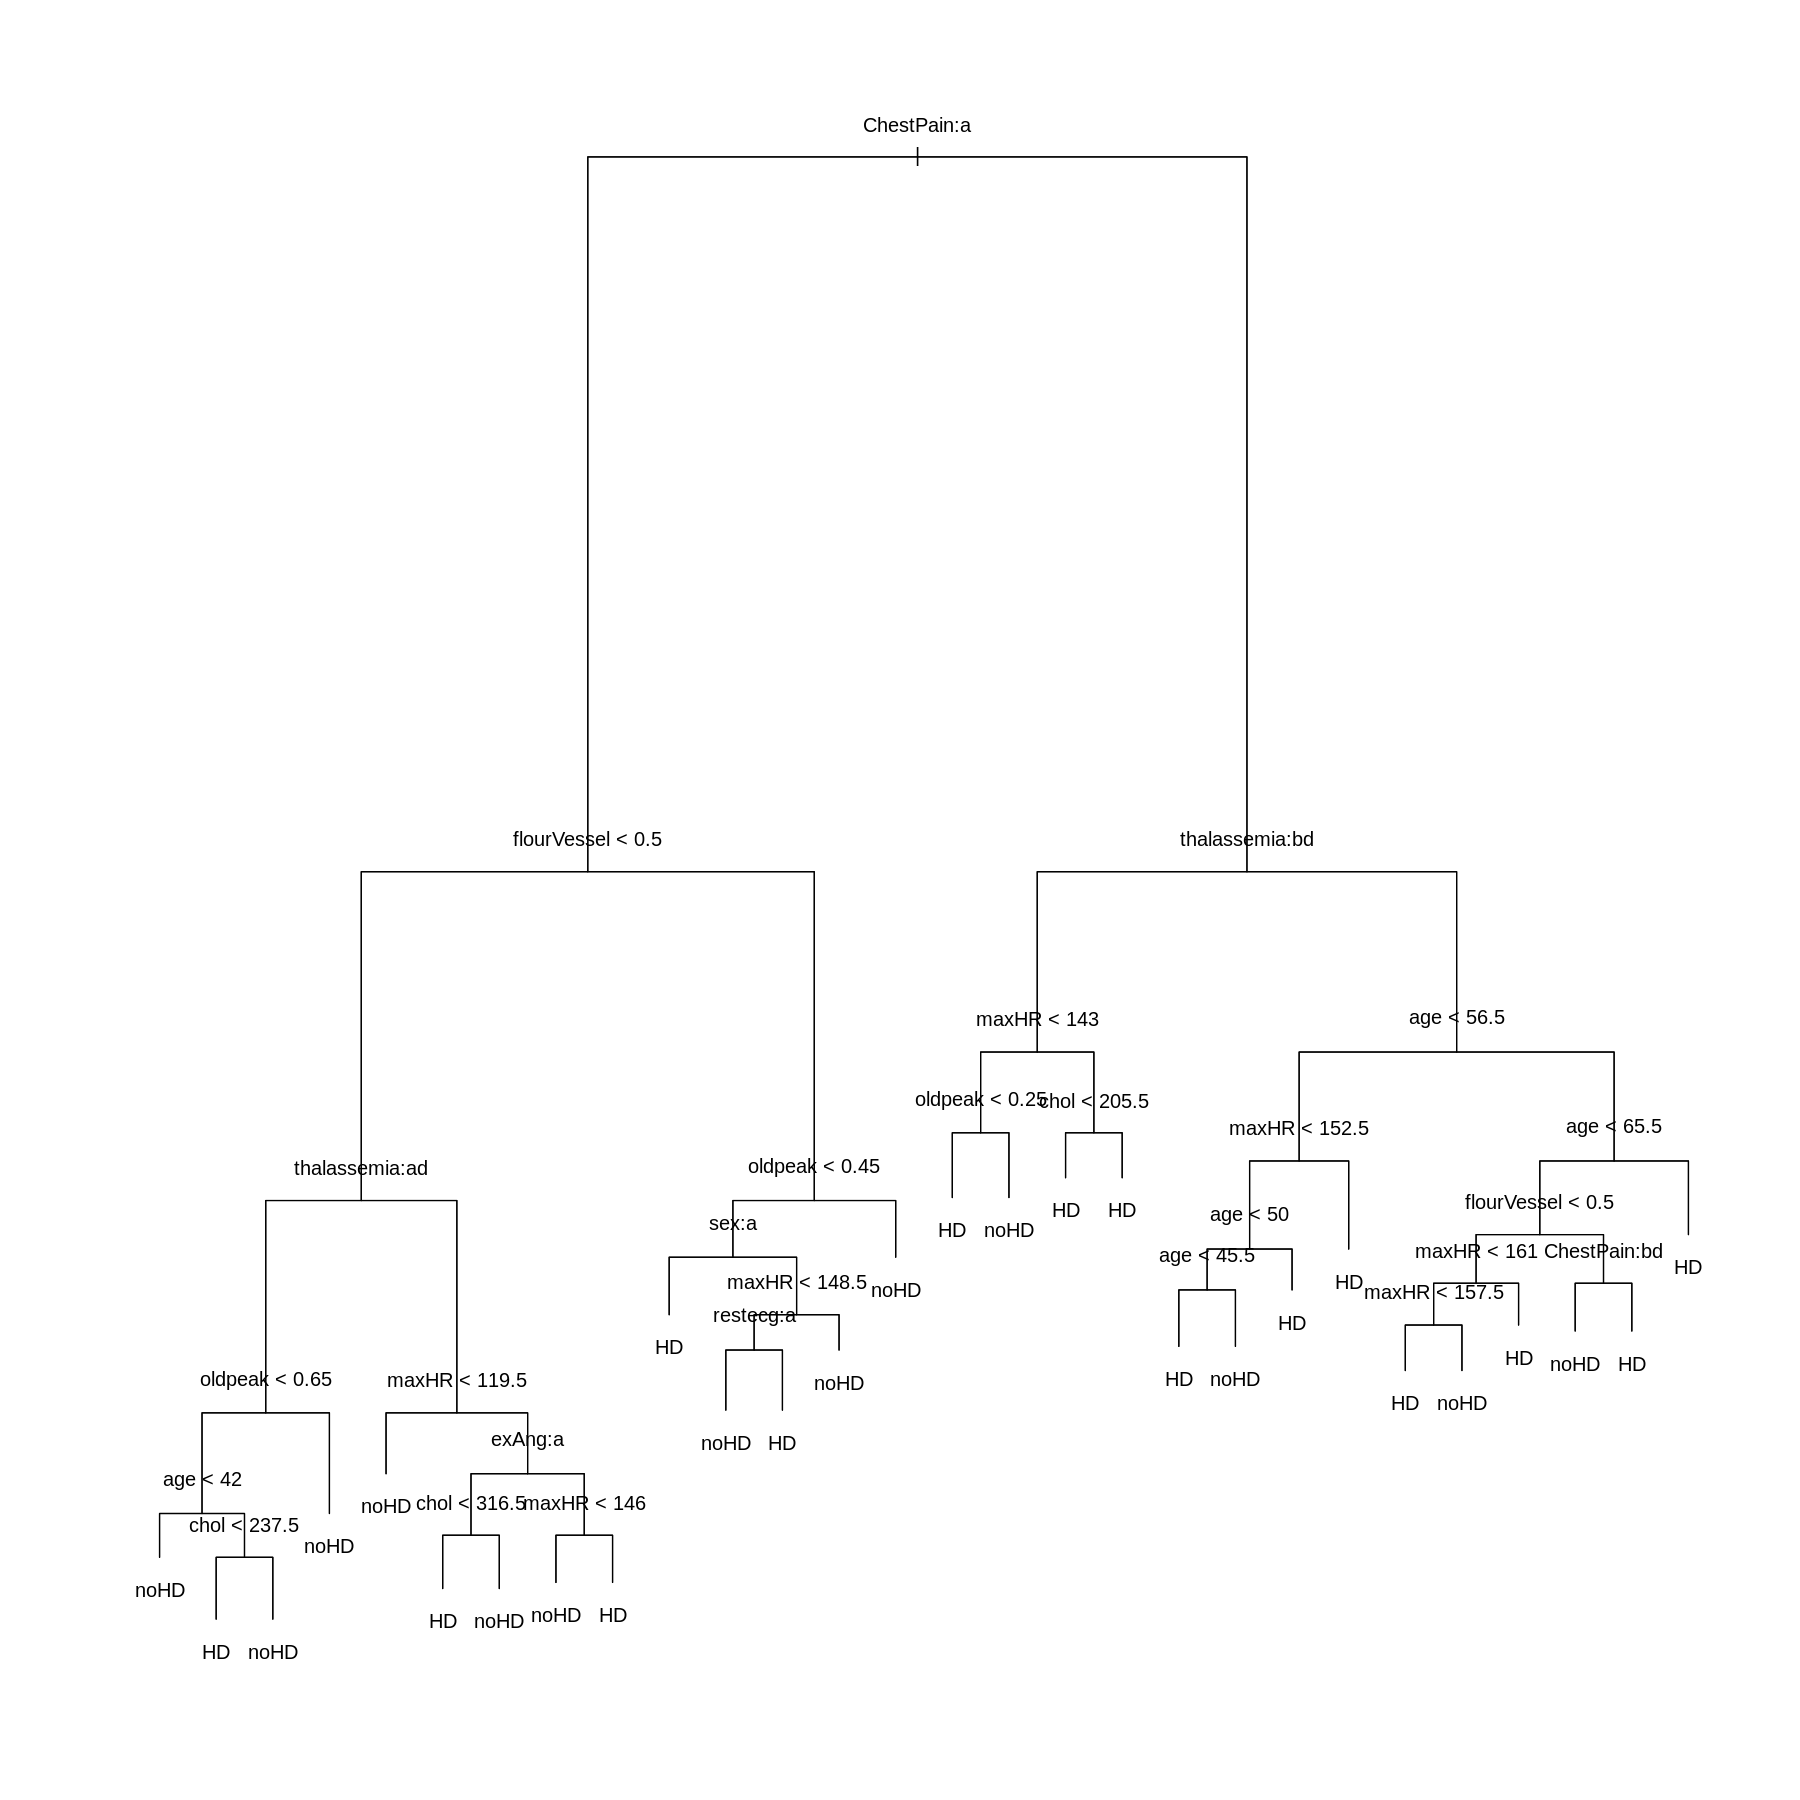

In [78]:
frmla <- heartDisease ~ .
tr <- tree(frmla, data = heart)
summary(tr)
plot(tr)
text(tr)
options(repr.plot.width=20, repr.plot.height=15)

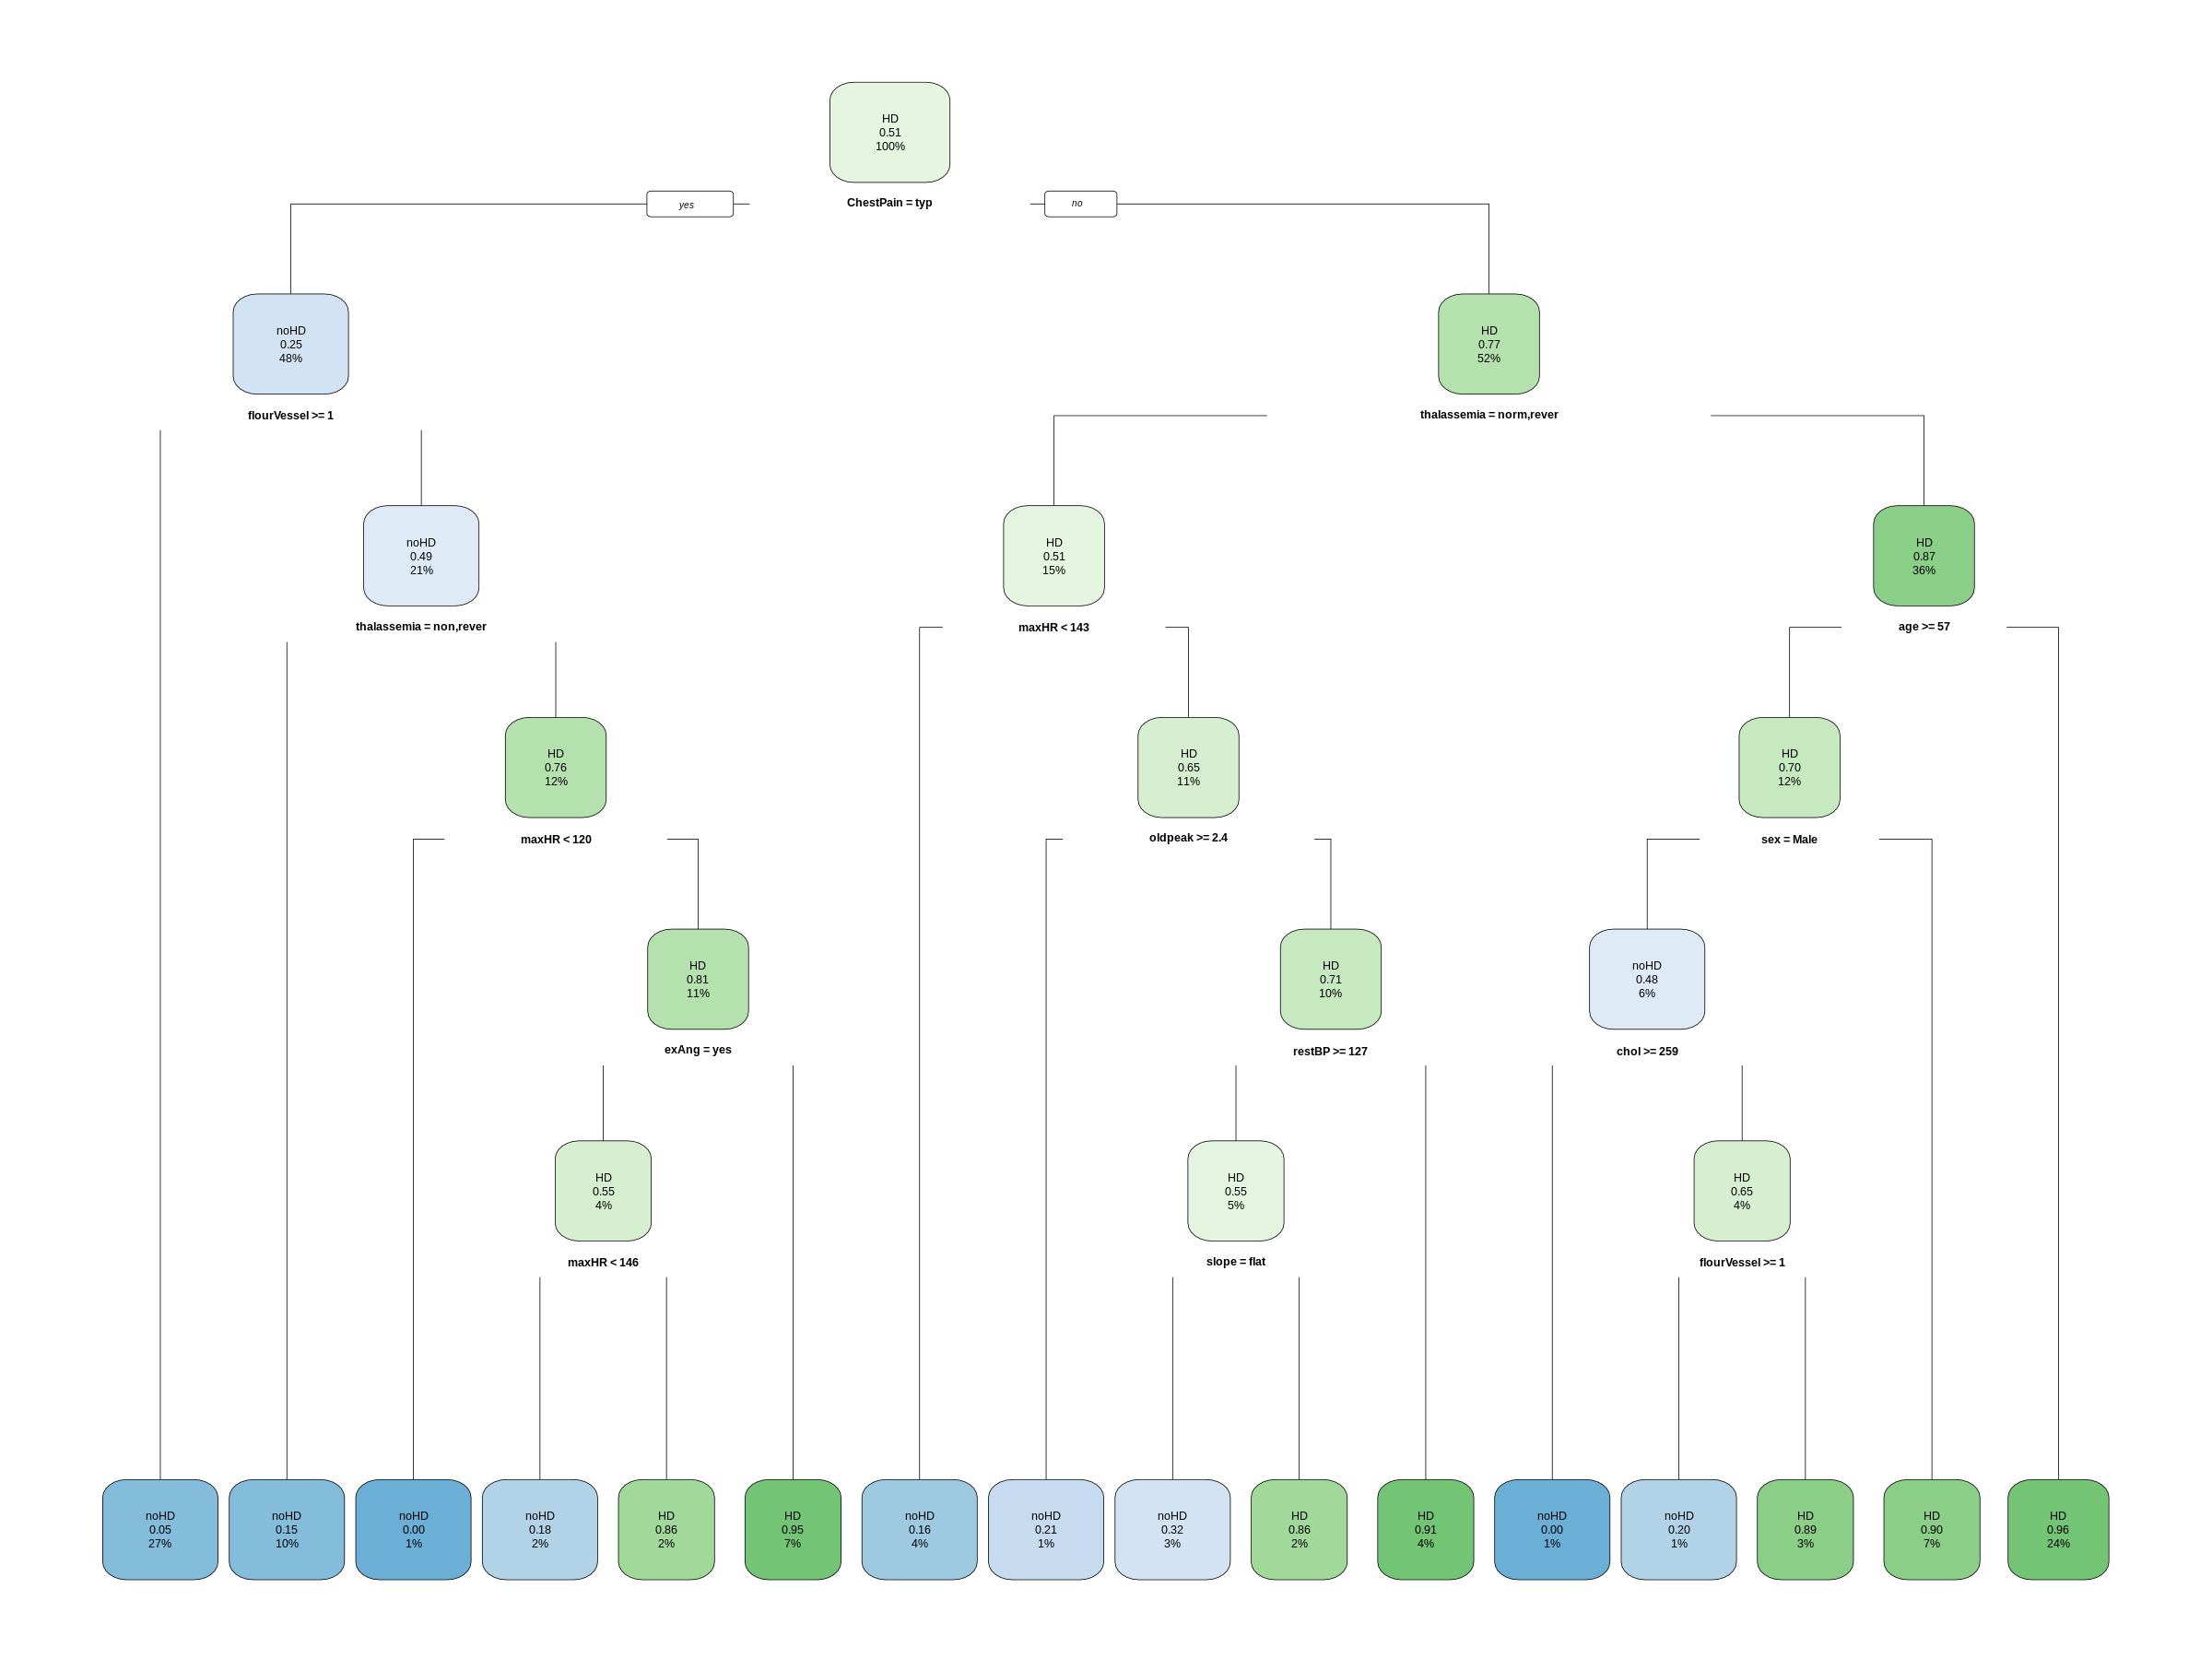

In [79]:
fit <- rpart(heartDisease ~ ., data = heart, method = 'class')
rpart.plot(fit)

In [5]:
library(e1071)

set.seed(123)

train_ind <- sample(seq_len(nrow(heart)), size = nrow(heart)*.7)
#bat2[train_ind,]
train <- heart[train_ind,]
test <- heart[-train_ind,]

m<- naiveBayes(frmla, data = train)
m


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
      CHD    No CHD 
0.4700139 0.5299861 

Conditional probabilities:
        age
Y            [,1]     [,2]
  CHD    56.77745 7.913654
  No CHD 52.62895 9.385427

        sex
Y           Female      Male
  CHD    0.1721068 0.8278932
  No CHD 0.4263158 0.5736842

        cp
Y             [,1]     [,2]
  CHD    0.4599407 0.909129
  No CHD 1.3947368 0.922869

        trestbps
Y            [,1]     [,2]
  CHD    133.6261 18.24673
  No CHD 129.4026 16.64240

        chol
Y            [,1]     [,2]
  CHD    251.8932 50.16586
  No CHD 241.0632 51.70554

        fbs
Y             [,1]      [,2]
  CHD    0.1543027 0.3617758
  No CHD 0.1500000 0.3575422

        restecg
Y             [,1]      [,2]
  CHD    0.4836795 0.5405031
  No CHD 0.6052632 0.5053525

        thalach
Y            [,1]     [,2]
  CHD    137.7300 23.37584
  No CHD 158.1263 19.44642

        ex

In [6]:
cor(heart)

ERROR: Error in cor(heart): 'x' must be numeric


In [ ]:
sub <- subset(heart, select = (-target))
sub
predict(tr,sub, type = 'class')

In [ ]:
sub$target <- heart$target # be sure to add the species to our subset now since we didn't have it before 
sub$pred <- predict(tr,sub, type = 'class') # predicted classes

head(sub)

In [ ]:
miss <- sub[sub$target != sub$pred,]

miss

## Step 2: Remember your Audience

In the cell below, describe your audience!
 * Who will the audience be?
 * What value will they derive from your story?

## Step 3: Find and Stage Your Data

If you data is from another source, such as Kaggle, you must download it to your local computer, then upload the data to JuptyerHub.

#### If you are uploading files:
 * Use folder navigation of your first JupyterTab to get to course's `/modules/module8/exercises/` folder.
![FP_Folder_Navigation.png MISSING](../images/FP_Folder_Navigation.png)
 * Click the Upload Button and Choose File(s)
![FP_Upload_Button.png MISSING](../images/FP_Upload_Button.png)
 * Activate the upload
![FP_UploadFile_2.png MISSING](../images/FP_UploadFile_2.png)
 

### In the cell below, please list the name(s) of the file(s) that are now accessible on the JupyterHub environment.

**Note**: 
If you uploaded a file to your `module8/exercises` folder, the file name is all you need to load it into the data frame in the usual manner.
If you are using a file from another module of the course, you should be able to copy the full pathname and use it as is in this notebook.

## Step 4: Vet Data Sources

Use the cells below to load the data, inspect it, conduct data carpentry and shaping; perform exploratory data analysis.  

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

## Step 5: Filter Results and Build and Validate Models


Perform any additional data carpentry and begin filtering results/data and then build, validate, and describe your model(s). 

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

## Step 6: Visualize Results

Build up your key visual story elements!

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

## Step 7: Communicate the Story to your intended audience using visualizations and narrative


In a few paragraphs, describe the story the data tells. 

Additionally, post your most compelling visual and provide a brief description of what it conveys on to our mutual aid channel (the slack course channel). 

Feel free to post more examples for people to look at and provide feedback. Your classmates will be vital providers of feedback in this process. Utilize them.

# Final Step: Connect your workflow/process to the DSA-Project Life Cycle
- List and briefly discuss how important details from each stage of the [DSA-PLC](../../module1/resources/DSA-ProjectLifecycle-slidedeck.pdf) played a role in your story development.
- Use markdown to provide this overview below:
<hr/>

<h1 align="center"><u>DSA-Project Life Cycle Discussion</u></h1>



# Save your notebook, then `File > Close and Halt`